# Установка пакетов

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingRegressor, BaggingClassifier, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('real_estate_data.csv')

In [4]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY


### Признаки:
- type - Тип объекта недвижимости
- sub_type - Подгруппа типа объекта недвижимости
- start_date - Дата начала активности объявления на рынке
- end_date - Дата окончания активности объявления на рынке
- listing_type - Тип объявления
- tom - Время на рынке
- building_age - Возраст здания
- total_floor_count - Общее количество этажей в здании
- floor_no - Информация о номере этажа для данного объявления
- room_count - Количество комнат в квартире
- size - Площадь дома
- address - Адрес объекта недвижимости
- furnished - Мебелирование
- heating_type - Различные типы систем отопления
- price - Цена объекта недвижимости
- price_currency - Валюта цены объекта недвижимости

In [5]:
df = df[df['price'] >= 1000]
df = df[df['price'] < 2000000000]

In [6]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 125256
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 22010
Кол-во пропусков в колонке total_floor_count = 23062
Кол-во пропусков в колонке floor_no = 30161
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 129560
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 362482
Кол-во пропусков в колонке heating_type = 22992
Кол-во пропусков в колонке price = 0
Кол-во пропусков в колонке price_currency = 0


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362482 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 362482 non-null  int64  
 1   type               362482 non-null  object 
 2   sub_type           362482 non-null  object 
 3   start_date         362482 non-null  object 
 4   end_date           237226 non-null  object 
 5   listing_type       362482 non-null  int64  
 6   tom                362482 non-null  int64  
 7   building_age       340472 non-null  object 
 8   total_floor_count  339420 non-null  object 
 9   floor_no           332321 non-null  object 
 10  room_count         362482 non-null  object 
 11  size               232922 non-null  float64
 12  address            362482 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       339490 non-null  object 
 15  price              362482 non-null  float64
 16  price_c

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,362482.0,200431.319453,1.159463e+05,1.0,98952.25,200916.5,300739.75,4.034870e+05
listing_type,362482.0,1.210452,4.078331e-01,1.0,1.00,1.0,1.00,3.000000e+00
tom,362482.0,58.036068,4.447410e+01,0.0,30.00,42.0,90.00,1.800000e+02
size,232922.0,298.802543,9.913596e+03,1.0,90.00,115.0,145.00,9.482350e+05
furnished,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,362482.0,388464.156082,3.828337e+06,1000.0,115000.00,225000.0,360000.00,1.650000e+09


In [10]:
df['furnished'].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
furnished_categories = [
    'Furnished',              # Меблированная
    'Unfurnished',             # Без мебели
    'Only white appliances',   # Только бытовая техника
    'Only kitchen'        # Только кухня
]

def fill_furnished_uniform(row):
    if pd.isna(row['furnished']):
        return np.random.choice(furnished_categories)
    return row['furnished']

df['furnished'] = df.apply(fill_furnished_uniform, axis=1)

print("Пропуски в furnished заполнены случайными значениями")
print("Распределение значений:")
print(df['furnished'].value_counts())

Пропуски в furnished заполнены случайными значениями
Распределение значений:
furnished
Only kitchen             90719
Only white appliances    90656
Furnished                90606
Unfurnished              90501
Name: count, dtype: int64


In [8]:
# Диапазоны цен
price_ranges = {'0': (1000, 260000000),'1': (1000, 40000000),'2': (1000, 40000000),'3': (1000, 36000000),
    '4': (1000, 75000000),'5': (1000, 53000000),'6-10 arası': (1000, 520000000),'11-15 arası': (1000, 185000000),
    '16-20 arası': (1000, 118000000),'21-25 arası': (1000, 310000000),'26-30 arası': (1000, 85000000),'31-35 arası': (1000, 200000000),
    '36-40 arası': (1000, 106000000),'40 ve üzeri': (1000, 1650000000)
}

def get_category(price):
    # Сначала ищем диапазон, куда попадает цена
    for category, (low, high) in price_ranges.items():
        if low <= price <= high:
            return category
    
    # Если не попала — выбираем ближайший по центру
    return min(price_ranges, key=lambda k: abs(price - (price_ranges[k][0] + price_ranges[k][1]) / 2))

df['building_age'] = df['building_age'].fillna(
    df['price'].apply(get_category)
)

In [9]:
# Создаем словарь для замены
room_count_mapping = {
    '6-10 arası': 8,
    '11-15 arası': 13,
    '16-20 arası': 18,
    '21-25 arası': 23,
    '26-30 arası': 28,
    '31-35 arası': 33,
    '36-40 arası': 38,
    '40 ve üzeri': 40,
    '40 ve uzeri': 40
}

def process_room_count(value):
    if pd.isna(value):
        return None
    
    value = str(value).strip()
    
    if value in room_count_mapping:
        return room_count_mapping[value]
    elif value.isdigit():
        return int(value)

df['building_age'] = df['building_age'].apply(process_room_count)

In [10]:
def convert_floor_count_to_numeric(floor_count):
    if pd.isna(floor_count):
        return np.nan
    
    if isinstance(floor_count, (int, float)) and not pd.isna(floor_count):
        return float(floor_count)
    
    # Если строка, пытаемся преобразовать
    if isinstance(floor_count, str):
        # Убираем лишние пробелы
        floor_count = floor_count.strip()
        
        try:
            return float(floor_count)
        except ValueError:
            if floor_count == '20 ve üzeri':
                return 20.0
    
    return np.nan

# Применяем преобразование
df['total_floor_count_numeric'] = df['total_floor_count'].apply(convert_floor_count_to_numeric)

# Заполняем пропуски средним значением
mean_floor_count = df['total_floor_count_numeric'].mean()
df['total_floor_count_numeric'] = df['total_floor_count_numeric'].fillna(mean_floor_count)

# Округляем до целых чисел
df['total_floor_count_numeric'] = df['total_floor_count_numeric'].round().astype(int)

# Заменяем исходную колонку или создаем новую
df['total_floor_count'] = df['total_floor_count_numeric']
df.drop('total_floor_count_numeric', axis=1, inplace=True)

print("Преобразование total_floor_count завершено")
print("Распределение числовых значений:")
print(df['total_floor_count'].value_counts().head(20))

Преобразование total_floor_count завершено
Распределение числовых значений:
total_floor_count
5     120143
4      73856
3      69329
2      25775
6      20813
10     11463
7      11258
8      10305
9       8462
20      6562
1       4516
Name: count, dtype: int64


In [11]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 125256
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 0
Кол-во пропусков в колонке total_floor_count = 0
Кол-во пропусков в колонке floor_no = 30161
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 129560
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 0
Кол-во пропусков в колонке heating_type = 22992
Кол-во пропусков в колонке price = 0
Кол-во пропусков в колонке price_currency = 0


In [12]:
def convert_floor_no(floor_value):
    if pd.isna(floor_value):
        # Для NaN возвращаем случайное значение от 1 до 20
        return np.random.randint(1, 21)
    
    if isinstance(floor_value, str):
        floor_value = floor_value.strip().lower()
        
        if 'yüksek giriş' in floor_value:
            return 1
        elif any(x in floor_value for x in ['giriş kat', 'kot1', 'zemin kat']):
            return 2
        elif 'çatı katı' in floor_value:
            return 3
        elif 'bahçe katı' in floor_value:
            # Для Bahçe katı возвращаем случайное значение
            return np.random.randint(1, 21)
    
    # Если значение уже числовое или не распознано, пытаемся преобразовать
    try:
        numeric_value = float(floor_value)
        # Проверяем, что значение разумное (между 1 и 50)
        if 1 <= numeric_value <= 50:
            return int(numeric_value)
        else:
            # Если значение вне диапазона, возвращаем случайное
            return np.random.randint(1, 21)
    except:
        # Если не можем преобразовать, возвращаем случайное значение
        return np.random.randint(1, 21)

# Применяем преобразование
df['floor_no'] = df['floor_no'].apply(convert_floor_no)

print("Преобразование floor_no завершено")
print("Распределение значений:")
print(df['floor_no'].value_counts().sort_index())

Преобразование floor_no завершено
Распределение значений:
floor_no
1     67817
2     75062
3     54680
4     35296
5     23625
6     13297
7     11544
8     10084
9      8815
10     7955
11     7151
12     6628
13     6031
14     5723
15     5221
16     4946
17     4855
18     4703
19     4599
20     4450
Name: count, dtype: int64


In [13]:
heating_codes = {
    'Kalorifer (Doğalgaz)': 1, 'Kalorifer (Kömür)': 2, 'Kombi (Elektrikli)': 3,
    'Klima': 4, 'Kombi (Doğalgaz)': 5, 'Merkezi Sistem': 6,
    'Merkezi Sistem (Isı Payı Ölçer)': 7, 'Yerden Isıtma': 8, 'Soba (Kömür)': 9,
    'Soba (Doğalgaz)': 10, 'Güneş Enerjisi': 11, 'Jeotermal': 12,
    'Fancoil': 13, 'Kat Kaloriferi': 14, 'Kalorifer (Akaryakıt)': 15, 'Yok': 16
}

# Заполняем heating_type
def convert_heating(heating):
    if pd.isna(heating):
        return np.random.randint(1, 17)
    
    if isinstance(heating, str):
        for key, code in heating_codes.items():
            if key in heating:
                return code
    try:
        num = int(heating)
        if 1 <= num <= 16:
            return num
    except:
        pass
    
    return np.random.randint(1, 17)

df['heating_type'] = df['heating_type'].apply(convert_heating)


In [14]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 125256
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 0
Кол-во пропусков в колонке total_floor_count = 0
Кол-во пропусков в колонке floor_no = 0
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 129560
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 0
Кол-во пропусков в колонке heating_type = 0
Кол-во пропусков в колонке price = 0
Кол-во пропусков в колонке price_currency = 0


In [15]:
df['size'].max()

948235.0

In [16]:
df['size'].min()

1.0

In [17]:
df['size'].value_counts()

size
90.0        14956
100.0       14318
120.0       13860
110.0       12038
130.0       10016
            ...  
1020.0          1
611.0           1
321.0           1
363679.0        1
1255.0          1
Name: count, Length: 942, dtype: int64

In [18]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 125256
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 0
Кол-во пропусков в колонке total_floor_count = 0
Кол-во пропусков в колонке floor_no = 0
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 129560
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 0
Кол-во пропусков в колонке heating_type = 0
Кол-во пропусков в колонке price = 0
Кол-во пропусков в колонке price_currency = 0


In [19]:
# Убираем ограничение на количество выводимых строк от 28 до 9000
pd.set_option('display.max_rows', None)
size_counts_sorted = df['size'].value_counts().sort_index()
print(size_counts_sorted)
pd.reset_option('display.max_rows')

size
1.0           249
2.0            26
3.0            22
4.0            16
5.0            17
6.0             4
7.0             1
8.0             6
9.0             1
10.0           35
11.0            4
12.0           10
13.0            4
14.0            3
15.0            8
16.0            1
17.0            6
18.0            6
19.0            5
20.0           21
21.0           14
22.0            7
23.0           20
24.0           10
25.0           59
26.0           18
27.0            9
28.0           22
29.0           14
30.0          199
31.0            9
32.0           55
33.0           31
34.0           31
35.0          262
36.0           47
37.0           36
38.0          124
39.0           26
40.0          904
41.0           32
42.0          137
43.0          102
44.0           76
45.0         1447
46.0           76
47.0          140
48.0          272
49.0          100
50.0         2946
51.0           69
52.0          225
53.0          146
54.0          122
55.0         3338
56.0 

In [20]:
too_small_mask = df['size'] < 28
too_large_mask = df['size'] > 9000
nan_mask = df['size'].isna()

# Заменяем значения меньше 28 на 28
df.loc[too_small_mask, 'size'] = 28.0

# Заменяем значения больше 9000 на 9000
df.loc[too_large_mask, 'size'] = 9000.0

# Заполняем пропуски случайными значениями от 28 до 9000
random_values = np.random.uniform(28, 9000, size=nan_mask.sum())
df.loc[nan_mask, 'size'] = random_values

# Округляем до 2 знаков после запятой
df['size'] = df['size'].round(2)

In [21]:
df['end_date'] = df['end_date'].fillna('03/09/25')

In [22]:
df['size'] = df['size'].dropna().astype(int)

In [23]:
df['sub_type'].value_counts()

sub_type
Daire                  315059
Villa                   21152
Müstakil Ev              8880
Rezidans                 7212
Yazlık                   5875
Komple Bina              2535
Prefabrik Ev              671
Çiftlik Evi               512
Köşk / Konak / Yalı       299
Yalı Dairesi              183
Kooperatif                 70
Loft                       34
Name: count, dtype: int64

In [24]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20,2,2+1,90,İstanbul/Kartal/Kordonboyu,Only white appliances,13,3500.0,TRY
1,2,Konut,Daire,2/13/19,03/09/25,1,14,0,20,5,1+0,43,İstanbul/Kartal/Kordonboyu,Only kitchen,13,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,1,2+1,5442,Tekirdağ/Çorlu/Reşadiye,Furnished,13,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20,1,6+1,450,İstanbul/Beşiktaş/Levent,Furnished,13,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20,2,2+1,90,İstanbul/Kartal/Kordonboyu,Unfurnished,13,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403480,403481,Konut,Daire,9/25/18,1/23/19,1,120,0,5,3,3+1,3230,Aydın/Didim/Efeler,Furnished,14,185000.0,TRY
403482,403483,Konut,Daire,9/18/18,03/09/25,2,162,0,5,16,+,8858,İstanbul/Sultanbeyli/Adil,Only kitchen,7,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,03/09/25,1,139,0,5,10,2+1,7180,Sakarya/Adapazarı/Cumhuriyet,Furnished,15,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,03/09/25,1,97,0,5,3,1+1,2215,Antalya/Alanya/Saray,Unfurnished,16,48000.0,EUR


In [25]:
def process_room_count(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if value == '+':
        return 1
    elif '+' in value:
        return sum(int(x) for x in value.split('+') if x.strip().isdigit())
    elif value.isdigit():
        return int(value)
    else:
        return None

df['room_count'] = df['room_count'].apply(process_room_count)

In [26]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,Only white appliances,13,3500.0,TRY
1,2,Konut,Daire,2/13/19,03/09/25,1,14,0,20,5,1,43,İstanbul/Kartal/Kordonboyu,Only kitchen,13,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,1,3,5442,Tekirdağ/Çorlu/Reşadiye,Furnished,13,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20,1,7,450,İstanbul/Beşiktaş/Levent,Furnished,13,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,Unfurnished,13,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403480,403481,Konut,Daire,9/25/18,1/23/19,1,120,0,5,3,4,3230,Aydın/Didim/Efeler,Furnished,14,185000.0,TRY
403482,403483,Konut,Daire,9/18/18,03/09/25,2,162,0,5,16,1,8858,İstanbul/Sultanbeyli/Adil,Only kitchen,7,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,03/09/25,1,139,0,5,10,3,7180,Sakarya/Adapazarı/Cumhuriyet,Furnished,15,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,03/09/25,1,97,0,5,3,2,2215,Antalya/Alanya/Saray,Unfurnished,16,48000.0,EUR


In [27]:
def convert_end_date(value):
    if pd.isna(value):
        return None
    
    # Пробуем преобразовать
    dt = pd.to_datetime(value, errors='coerce')
    
    # Если преобразование успешно и не NaT
    if not pd.isna(dt):
        return dt.date()
    else:
        return None

df['end_date'] = df['end_date'].apply(convert_end_date)

In [28]:
df['start_date'] = df['start_date'].apply(convert_end_date)

In [29]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date']   = pd.to_datetime(df['end_date'], errors='coerce')

print(df.dtypes[['start_date', 'end_date']])

start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object


In [30]:
# Разница в днях
df['rental_duration'] = (df['end_date'] - df['start_date']).dt.days

In [31]:
furnish = {
    'Furnished': 1,
    'Unfurnished': 0,
    'Only white appliances': 1,
    'Only kitchen': 1,
}

df2 = df

df['furnished'] = df2['furnished'].map(furnish)

In [32]:
# Создаем веса на основе бизнес-логики
custom_weights = {
    'Daire': 1,
    'Rezidans': 4,
    'Villa': 2,
    'Müstakil Ev': 3,
    'Yazlık': 5,
    'Komple Bina': 6,
    'Prefabrik Ev': 7,
    'Çiftlik Evi': 8,
    'Köşk / Konak / Yalı': 9,
    'Yalı Dairesi': 10,
    'Kooperatif': 11,
    'Loft': 12
}

df2 = df

df['sub_type'] = df2['sub_type'].map(custom_weights)

In [33]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency,rental_duration
0,1,Konut,4,2018-12-10,2019-01-09,2,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,1,13,3500.0,TRY,30
1,2,Konut,1,2019-02-13,2025-03-09,1,14,0,20,5,1,43,İstanbul/Kartal/Kordonboyu,1,13,490000.0,TRY,2216
2,3,Konut,1,2018-10-09,2018-11-08,1,30,0,1,1,3,5442,Tekirdağ/Çorlu/Reşadiye,1,13,155000.0,TRY,30
3,4,Konut,4,2018-09-10,2018-10-10,1,30,3,20,1,7,450,İstanbul/Beşiktaş/Levent,1,13,32500000.0,TRY,30
4,5,Konut,4,2018-12-10,2019-01-09,1,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,0,13,1450000.0,TRY,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403480,403481,Konut,1,2018-09-25,2019-01-23,1,120,0,5,3,4,3230,Aydın/Didim/Efeler,1,14,185000.0,TRY,120
403482,403483,Konut,1,2018-09-18,2025-03-09,2,162,0,5,16,1,8858,İstanbul/Sultanbeyli/Adil,1,7,1500.0,TRY,2364
403483,403484,Konut,1,2018-10-11,2025-03-09,1,139,0,5,10,3,7180,Sakarya/Adapazarı/Cumhuriyet,1,15,120000.0,TRY,2341
403484,403485,Konut,1,2018-11-22,2025-03-09,1,97,0,5,3,2,2215,Antalya/Alanya/Saray,0,16,48000.0,EUR,2299


In [34]:
df['price'] = df['price'].dropna().astype(int)

In [35]:
# оставить только цены > 0 и < 10 млн (можно подбирать верхнюю границу)
df = df[(df['price'] > 0) & (df['price'] < 1e7)]
df = df[df['price_currency'] == 'TRY']
df = df[df['size'] <= 1000]

In [36]:
# Цена за квадратный метр
df['price_per_sqm'] = df['price'] / df['size']
df['price_per_sqm'] = df['price_per_sqm'].dropna().astype(int)

In [37]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency,rental_duration,price_per_sqm
0,1,Konut,4,2018-12-10,2019-01-09,2,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,1,13,3500,TRY,30,38
1,2,Konut,1,2019-02-13,2025-03-09,1,14,0,20,5,1,43,İstanbul/Kartal/Kordonboyu,1,13,490000,TRY,2216,11395
4,5,Konut,4,2018-12-10,2019-01-09,1,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,0,13,1450000,TRY,30,16111
5,6,Konut,4,2018-11-09,2018-12-09,1,30,2,5,10,2,45,İstanbul/Maltepe/Altayçeşme,1,13,780000,TRY,30,17333
6,7,Konut,1,2019-01-04,2025-03-09,2,54,0,20,14,4,160,İstanbul/Kartal/Kordonboyu,1,13,3750,TRY,2256,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403473,403474,Konut,1,2018-09-16,2018-11-19,1,64,0,5,5,4,118,Bursa/Gürsu/Kurtuluş,1,5,236000,TRY,64,2000
403475,403476,Konut,1,2019-02-01,2019-02-01,1,0,0,5,6,4,100,İstanbul/Maltepe/Bağlarbaşı,1,4,600000,TRY,0,6000
403476,403477,Konut,1,2019-02-11,2025-03-09,1,16,0,5,3,4,110,Ankara/Mamak/Araplar,1,11,200000,TRY,2218,1818
403478,403479,Konut,1,2018-10-12,2018-11-11,1,30,0,5,20,4,188,Aydın/Didim/Efeler,0,3,500000,TRY,30,2659


## Вывод: 
Подставили пустые значения, добавили 2 колонок rental_duration и price_per_sqm, заменили строковые значения на числовые.

In [38]:
df2 = df[['sub_type','listing_type','tom','building_age','total_floor_count','floor_no','room_count','size','heating_type','price']]

<Axes: >

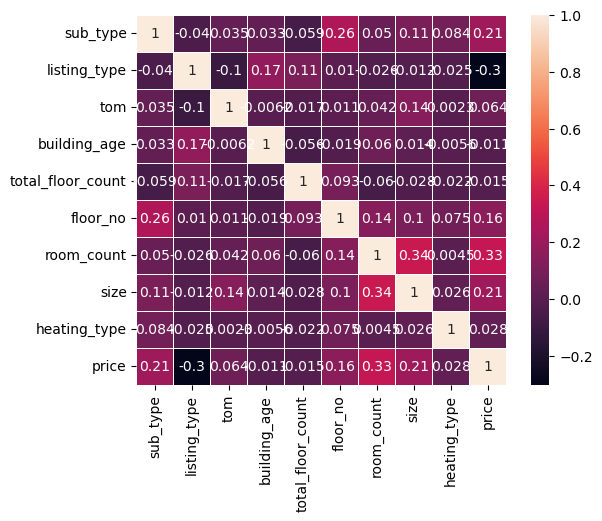

In [41]:
sns.heatmap(df2.corr(), square=True, annot=True, linewidths=.5)

In [42]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency,rental_duration,price_per_sqm
0,1,Konut,4,2018-12-10,2019-01-09,2,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,1,13,3500,TRY,30,38
1,2,Konut,1,2019-02-13,2025-03-09,1,14,0,20,5,1,43,İstanbul/Kartal/Kordonboyu,1,13,490000,TRY,2216,11395
4,5,Konut,4,2018-12-10,2019-01-09,1,30,0,20,2,3,90,İstanbul/Kartal/Kordonboyu,0,13,1450000,TRY,30,16111
5,6,Konut,4,2018-11-09,2018-12-09,1,30,2,5,10,2,45,İstanbul/Maltepe/Altayçeşme,1,13,780000,TRY,30,17333
6,7,Konut,1,2019-01-04,2025-03-09,2,54,0,20,14,4,160,İstanbul/Kartal/Kordonboyu,1,13,3750,TRY,2256,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403473,403474,Konut,1,2018-09-16,2018-11-19,1,64,0,5,5,4,118,Bursa/Gürsu/Kurtuluş,1,5,236000,TRY,64,2000
403475,403476,Konut,1,2019-02-01,2019-02-01,1,0,0,5,6,4,100,İstanbul/Maltepe/Bağlarbaşı,1,4,600000,TRY,0,6000
403476,403477,Konut,1,2019-02-11,2025-03-09,1,16,0,5,3,4,110,Ankara/Mamak/Araplar,1,11,200000,TRY,2218,1818
403478,403479,Konut,1,2018-10-12,2018-11-11,1,30,0,5,20,4,188,Aydın/Didim/Efeler,0,3,500000,TRY,30,2659


In [43]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 0
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 0
Кол-во пропусков в колонке total_floor_count = 0
Кол-во пропусков в колонке floor_no = 0
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 0
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 0
Кол-во пропусков в колонке heating_type = 0
Кол-во пропусков в колонке price = 0
Кол-во пропусков в колонке price_currency = 0
Кол-во пропусков в колонке rental_duration = 0
Кол-во пропусков в колонке price_per_sqm = 0


# Регрессия

In [45]:
X = df[['listing_type','tom','building_age','total_floor_count','floor_no','room_count','size','heating_type','sub_type','furnished','rental_duration','price_per_sqm']]
y = df['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
base_model = DecisionTreeRegressor()

bagging = BaggingRegressor(estimator=base_model,n_estimators=100,random_state=42)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
accuracy1 = bagging.score(X_test,y_test)


In [54]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1603.5534928023742
RMSE: 24039.532530969784
R²: 0.9982472256582214


- MAE — Средняя абсолютная ошибка
- RMSE — Cреднеквадратическая ошибка
- R² — Коэффициент детерминации

In [55]:
boosting = XGBRegressor(
    n_estimators=500,   # количество деревьев
    learning_rate=0.05, # шаг обучения
    max_depth=6,        # глубина деревьев
    random_state=42
)

boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
accuracy2 = boosting.score(X_test,y_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 9880.528767037724
RMSE: 96644.17522276487
R²: 0.9716713852133


In [57]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

final_model = LinearRegression()

stacking = StackingRegressor(estimators=base_models, final_estimator=final_model)

stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
accuracy3 = stacking.score(X_test,y_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3088.8360011496547
RMSE: 23525.815632091722
R²: 0.9983213376530286


In [61]:
regres =["Bagging", "Boosting", "Stacking"]

log_cols = ["Regress","Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Regress"] = regres
log["Accuracy"] = [accuracy1, accuracy2, accuracy3]
log

,Regress,Accuracy
0,Bagging,0.998247
1,Boosting,0.971671
2,Stacking,0.998321


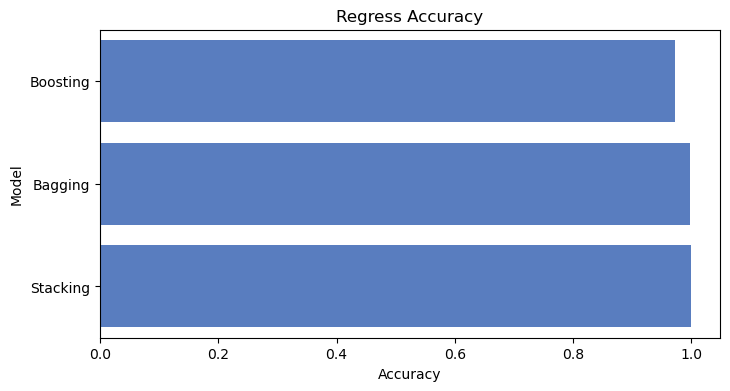

In [63]:
plt.figure(figsize=(8,4))
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Regress', data=log.sort_values(by='Accuracy'), color="b")
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Regress Accuracy')
plt.show()

## Вывод:
Лучшим себя покказал Stacking с небольшим отрывом от Bagging.